# SMI data analysis with Python
**Authors**:<br>Marlon Marzer, marlon.marzer@stud.hslu.ch<br>Dario Schürch, dario.schuerch@hslu.ch<br>
**Lecturer**:<br>Simon Broda, simon.broda@hslu.ch

In [410]:
https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

#Cheatsheet wie man Folie auf Jupyter erstellt, nur als Hilfe

SyntaxError: invalid syntax (Temp/ipykernel_20672/3063973600.py, line 1)

In [411]:
# Daten COVID 2019-2021 = 3 Jahre / Finanzkrise 2008-2010 = 3 Jahre sinnvoll?

## Kurzer Beschrieb was wir im File machen? / Inhaltsverzeichnis?

Idee: Vergleich von  SMI und fünf definierte Titeln während der Finanazkrise und der COVID-Pandemie 

- X
- X

### Get the Data

In [457]:
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

start = datetime(2004,1,1)
end = datetime.today()
SMI= yf.download("^SSMI", start, end)

SMI.to_csv("SMI_ALL.csv")



[*********************100%***********************]  1 of 1 completed


# Moving Average of ......... 50 Day / 200 Day Base 2004-2022

Text(0.5, 1.0, 'SMI 2004-2022: Moving Average of a 50 and 200 Day Base')

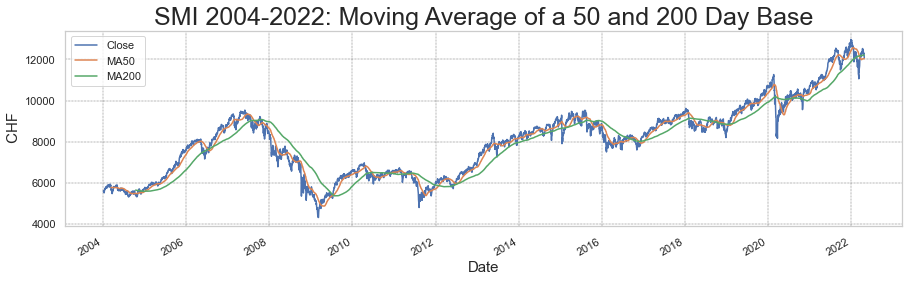

In [458]:
#Gleitender Mittelwert 50 / 200 2004 - 2022
SMI["MA50"] = SMI["Close"].rolling(50).mean()
SMI["MA200"] = SMI["Close"].rolling(200).mean()
SMI["Close"].plot(figsize = (15,4))
SMI["MA50"].plot()
SMI["MA200"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("SMI 2004-2022: Moving Average of a 50 and 200 Day Base", fontsize = 25)

# Moving Average of ......... 50 Day / 200 Day Base 2008-2010

### Get the Data

In [459]:
#get the data
start = datetime(2008,1,1)
end = datetime(2010,12,12)
SMI_08= yf.download("^SSMI", start, end)
SMI_08.to_csv("SMI_08.csv")



[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SMI 2008-2010: Moving Average of a 50 and 100 Day Base')

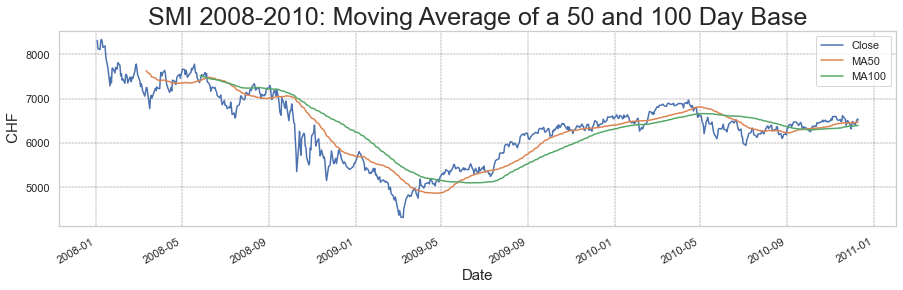

In [460]:
#plot
SMI_08 ["MA50"] = SMI_08["Close"].rolling(50).mean()
SMI_08 ["MA100"] = SMI_08["Close"].rolling(100).mean()
SMI_08["Close"].plot(figsize = (15,4))
SMI_08["MA50"].plot()
SMI_08["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("SMI 2008-2010: Moving Average of a 50 and 100 Day Base", fontsize = 25)


# Moving Average of ......... 50 Day / 200 Day Base 2019-2021

### Get the Data

In [461]:
start = datetime(2019,1,1)
end = datetime(2021,12,31)
SMI_19= yf.download("^SSMI", start, end)

SMI_19.to_csv("SMI_19.csv")




[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving Average of a 50 and 100 Day Base SMI 2019-2021')

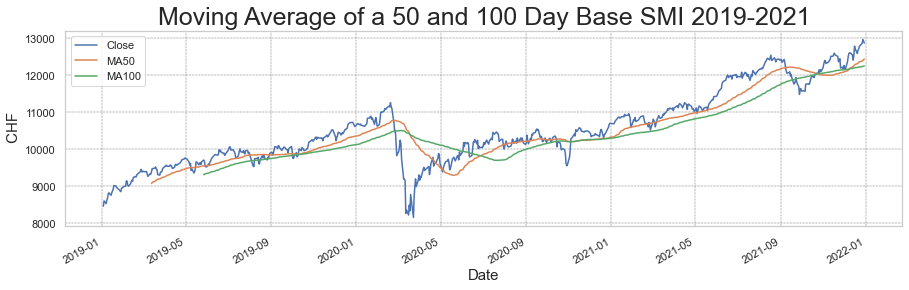

In [462]:
SMI_19["MA50"] = SMI_19["Close"].rolling(50).mean()
SMI_19["MA100"] = SMI_19["Close"].rolling(100).mean()
SMI_19["Close"].plot(figsize = (15,4))
SMI_19["MA50"].plot()
SMI_19["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving Average of a 50 and 100 Day Base SMI 2019-2021", fontsize = 25)





## Mittelwert als Kennzahl 2008-2010 und 2019-2021 als Kennzahl  (macht irgendwie keinen Sinn)

In [463]:
mean_SMI_08 = SMI_08["Close"].mean()
mean_SMI_19 = SMI_19["Close"].mean()
print(mean_SMI_08)
print(mean_SMI_19)


6356.967849915286
10520.767878706738


# Comparison Volatility SMI 2008-2010 and SMI 2019-2021

In [464]:
##Calculate pct change & log return --> Note: pct Change and Log return calculate nearly the same values

In [465]:
df_08 = pd.read_csv("SMI_08.csv",sep = ",", index_col=0)
df_08["Pct Change"]= df_08["Close"].pct_change()
df_08["Log Return"]= np.log(df_08["Close"]/df_08["Close"].shift(1))
df_08.head()



,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2008-01-03,8410.099609,8421.000000,8273.299805,8318.799805,8318.799805,70784600,NaN,NaN
2008-01-04,8306.700195,8344.299805,8109.899902,8130.000000,8130.000000,82516600,-0.022696,-0.022957
2008-01-07,8090.500000,8213.099609,8070.299805,8110.600098,8110.600098,102996500,-0.002386,-0.002389
2008-01-08,8128.899902,8385.400391,8127.600098,8316.400391,8316.400391,132311200,0.025374,0.025058
2008-01-09,8263.500000,8345.500000,8216.299805,8339.799805,8339.799805,107972400,0.002814,0.002810


In [466]:
df_19 = pd.read_csv("SMI_19.csv",sep = ",", index_col=0)
df_19["Pct Change"]= df_19["Close"].pct_change()
df_19["Log Return"]= np.log(df_19["Close"]/df_19["Close"].shift(1))
df_19.head()


,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2019-01-03,8391.900391,8503.070312,8388.969727,8466.009766,8466.009766,67638200,NaN,NaN
2019-01-04,8493.839844,8627.360352,8441.339844,8608.559570,8608.559570,58578200,0.016838,0.016698
2019-01-07,8616.179688,8617.009766,8491.500000,8535.950195,8535.950195,46142100,-0.008435,-0.008470
2019-01-08,8560.330078,8670.669922,8560.160156,8629.480469,8629.480469,53742100,0.010957,0.010898
2019-01-09,8661.429688,8700.179688,8625.400391,8687.709961,8687.709961,52999900,0.006748,0.006725


In [467]:
# Volatilität SMI über 3 Börsenjahre in den jeweiligen Krisen (252 *3) stimmt?

In [468]:
ln_SMI_08= df_08["Log Return"].std()
ln_SMI_19= df_19["Log Return"].std()
std_SMI_08 = ln_SMI_08 * np.sqrt(756) * 100
std_SMI_19 = ln_SMI_19 * np.sqrt(756) * 100

print(std_SMI_08)
print(std_SMI_19)


43.26581473111181
28.65452644105569


# Comparison Volatility SMI 2008-2010 and SMI 2019-2021 --> stetige Rendite

Text(0.5, 1.0, 'Volatility SMI 2008-2010 and SMI 2019-2021')

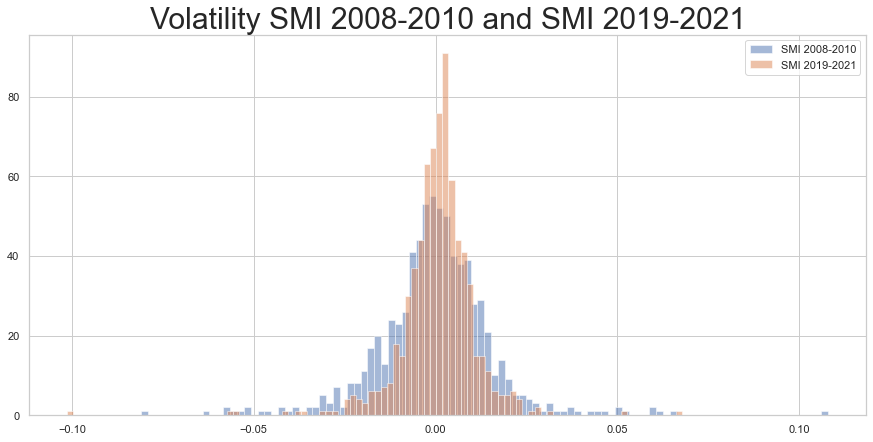

In [469]:
df_08["Log Return"].hist(bins = 100, label = "SMI 2008-2010", alpha = 0.5, figsize = (15,7))
df_19["Log Return"].hist(bins = 100, label = "SMI 2019-2021", alpha = 0.5)
plt.legend()
plt.title("Volatility SMI 2008-2010 and SMI 2019-2021", fontsize = 30)




In [470]:
#Wie man in den Kennzahlen schon sieht; SMI 08 = volatiler

# Value at Risk von 5 auserwählten Titel des SMI during Financial Crisis 2008-2010
# wir gehen bei der Berechnung des VaR davon aus, dass die Renditen der Aktien in unserem Portfolio normalverteilt sind

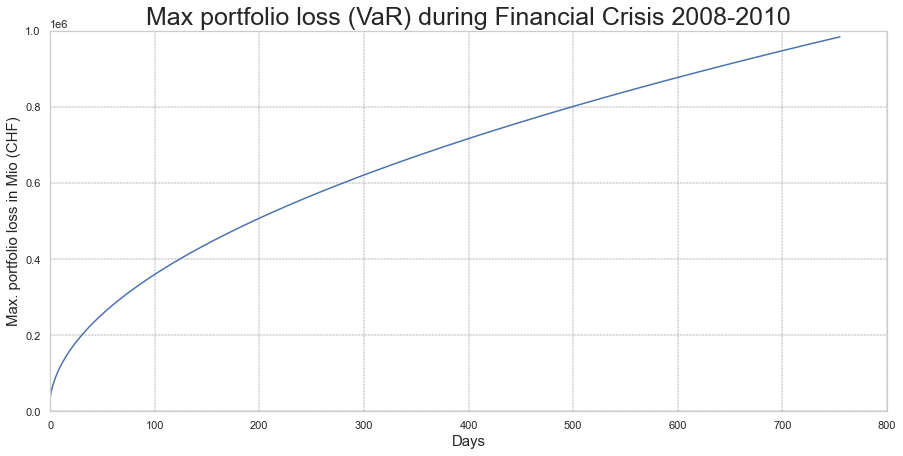

In [471]:
from pandas_datareader import data as pdr
from scipy.stats import norm
portfolio_08 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_08 = np.array([.2, .2, .2, .2, .2])
investment_08 = 1000000
start_08 = datetime(2008,1,1)
end_08 = datetime(2010,12,31)
df_08 = pdr.get_data_yahoo(portfolio_08, start_08, end_08) ["Close"]
returns_08 = df_08.pct_change()

# Generate Var-Cov matrix (Kovarianzmatrix)
cov_matrix_08 = returns_08.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_08 = returns_08.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_08 = mean_returns_08.dot(weights_08)

#Standard deviation of the portfolio
std_portfolio_08 = np.sqrt(weights_08.T.dot(cov_matrix_08).dot(weights_08))

#Mean of investment
mean_investment_08 = (1+mean_portfolio_08) * investment_08

#Standard deviation of investment
std_investment_08 = investment_08 * std_portfolio_08

#Konfidenzintervall (95%)
conf_level_08 = 0.05
var_cutoff_08 = norm.ppf(conf_level_08, mean_investment_08, std_investment_08) #normal cumulatice distribution
Var_08 = investment_08 - var_cutoff_08
#print(Var_08)


#Calculate VaR over 3 Years
import matplotlib.pyplot as plt
Var_array_08= []
days_08 = int(756)
for x in range(1, days_08+1):
    Var_array_08.append(np.round(Var_08 * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var_08 * np.sqrt(x), 2))) # acitvate code to see VaR over 2 years

plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss in Mio (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,1000000)
plt.title("Max portfolio loss (VaR) during Financial Crisis 2008-2010", fontsize = 25)
plt.plot(Var_array_08, "b")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)




# #(Extra) Checking distributions of our equities against normal distribution
As mentioned in the calculation section, we are assuming that the returns of the equities in our portfolio are normally distributed when calculating VaR. Of course, we can't predict that moving forward, but we can at least check how the historical returns have been distributed to help us assess whether VaR is suitable to use for our portfolio

# 5 Titel im Portfolio vs Normalverteilung während der Finanzkrise 2008-2010

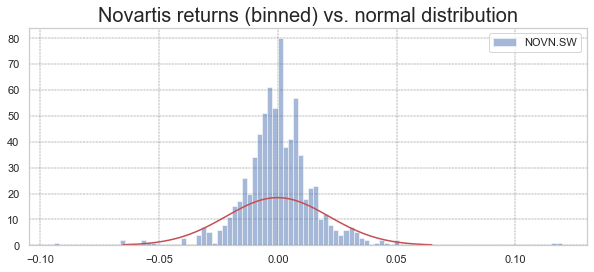

In [472]:

#Checking distributions of equities against normal distribution
import matplotlib.pyplot as plt
import scipy as scipy
returns_08["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Novartis returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()



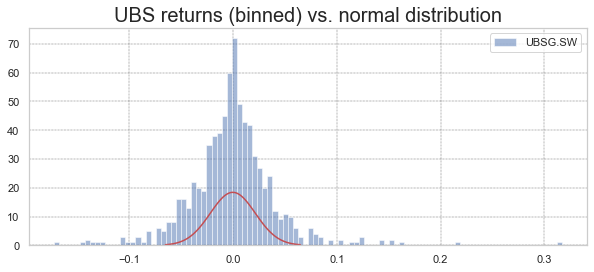

In [473]:
returns_08["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("UBS returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

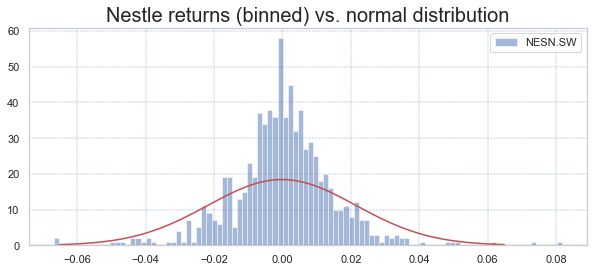

In [474]:
returns_08["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Nestle returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='b', linestyle='-.', linewidth=0.3)
plt.legend()

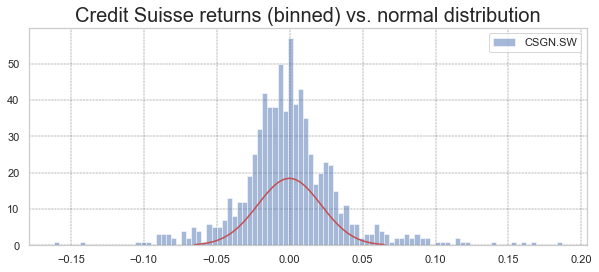

In [475]:
returns_08["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Credit Suisse returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

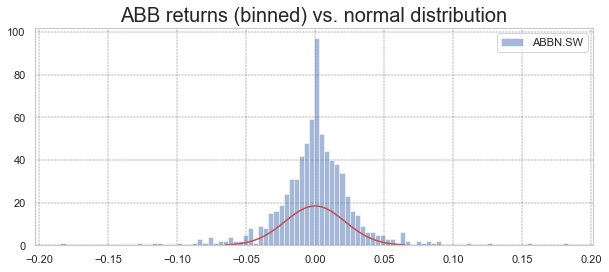

In [476]:
returns_08["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("ABB returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

In [477]:
#Daten zeigen Aktien waren nicht normalverteilt??

# Value at Risk von 5 auserwählten Titel des SMI during COVID-19 2019-2021
#wir gehen bei der Berechnung des VaR davon aus, dass die Renditen der Aktien in unserem Portfolio normalverteilt sin

In [478]:
#VaR 5  Titel 2019-2021  during COVID
portfolio_19 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_19 = np.array([.2, .2, .2, .2, .2])
investment_19 = 1000000
start_19 = datetime(2019,1,1)
end_19 = datetime(2021,12,31)
df_19 = pdr.get_data_yahoo(portfolio_19, start_19, end_19) ["Close"]
returns_19 = df_19.pct_change()
#print(returns)

# Generate Var-Cov matrix (Kovarianzmatrix)
cov_matrix_19 = returns_19.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_19 = returns_19.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_19 = mean_returns_19.dot(weights_19)

#Standard deviation of the portfolio
std_portfolio_19 = np.sqrt(weights_19.T.dot(cov_matrix_19).dot(weights_19))

#Mean of investment
mean_investment_19 = (1+mean_portfolio_19) * investment_19

#Standard deviation of investment
std_investment_19 = investment_19 * std_portfolio_19

#Konfidenzintervall (95%)
conf_level_19 = 0.05
var_cutoff_19 = norm.ppf(conf_level_19, mean_investment_19, std_investment_19) #normal cumulatice distribution
Var = investment_19 - var_cutoff_19
#print(Var)



In [479]:
#Calculate VaR over 3 Years
import matplotlib.pyplot as plt
Var_array_19= []
days_19 = int(756)
for x in range(1, days_19+1):
    Var_array_19.append(np.round(Var * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(VaR * np.sqrt(x), 2))) # acitvate code to see VaR over 2 years


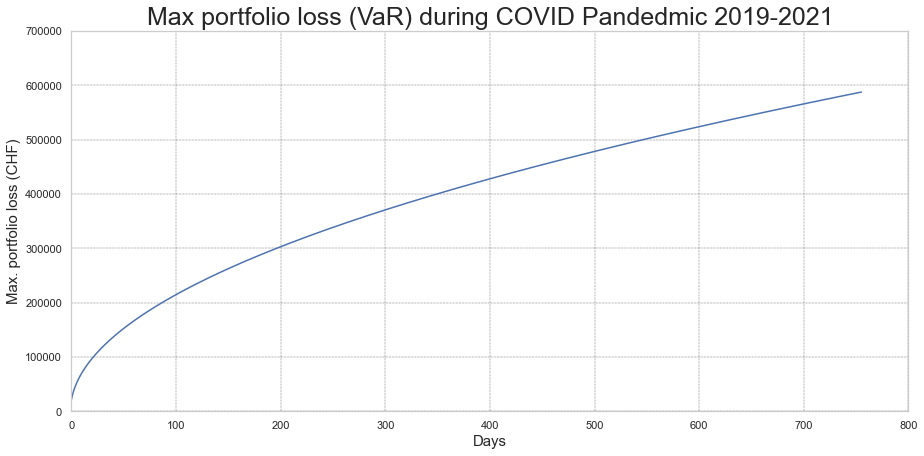

In [480]:
plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,700000)
plt.title("Max portfolio loss (VaR) during COVID Pandedmic 2019-2021", fontsize = 25)
plt.plot(Var_array_19, "b")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)

# Checking distributions of equities against normal distribution
# 5 Titel im Portfolio vs Normalverteilung während der COVID-19 Pandemie 

As mentioned in the calculation section, we are assuming that the returns of the equities in our portfolio are normally distributed when calculating VaR. Of course, we can't predict that moving forward, but we can at least check how the historical returns have been distributed to help us assess whether VaR is suitable to use for our portfolio

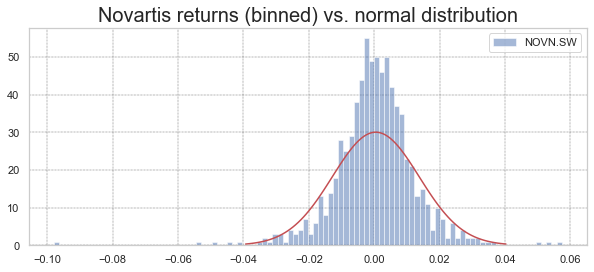

In [481]:
returns_19["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Novartis returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

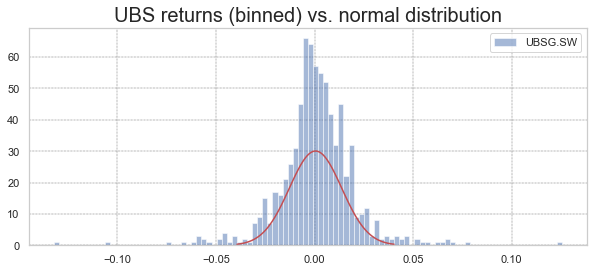

In [482]:
returns_19["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("UBS returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

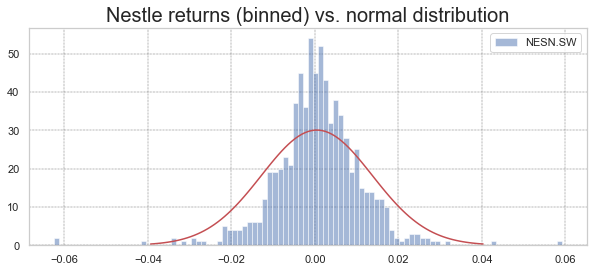

In [483]:
returns_19["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Nestle returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()


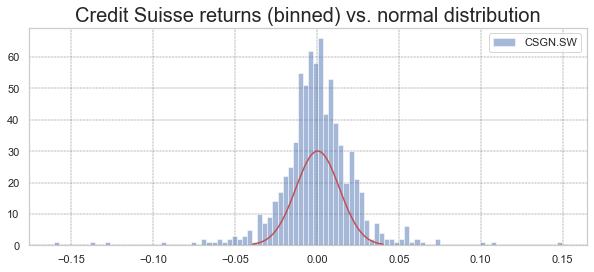

In [484]:
returns_19["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Credit Suisse returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle='-.', linewidth=0.3)
plt.legend()

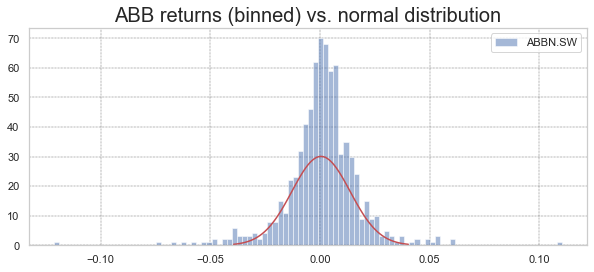

In [485]:
returns_19["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("ABB returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

In [486]:
#Daten zeigen Aktien waren nicht normalverteilt?? oder?

In [487]:
#Sharp Ratio Portfolio SMI 2008-2010

In [488]:
#Sharp ratio Portfolio 2008-2010
returns_08 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_08 = std_portfolio_08
risk_free_return_08 = int(0.018) # Annahme
sharpe_ratio_08= (mean_portfolio_08 - risk_free_return_08) / std_08
print(sharpe_ratio_08)

-0.007642742720909455


In [489]:
returns_19 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_19 = std_portfolio_19
risk_free_return_19 = 0 # Annahme
sharpe_ratio_19= (mean_portfolio_19 - risk_free_return_19) / std_19
print(sharpe_ratio_19)

0.036040497562859874


In [ ]:
y = [sharpe_ratio_08, sharpe_ratio_19]
x = ["Portfolio 2008-2010", "Portfolio 2019-2021"]

plt.figure(figsize=(10,7))
plt.bar(x, y, color=["b","g"])
plt.xlim(0,1)
plt.ylim(-0.01,0.06)
plt.ylabel("Sharpe Ratio", fontsize = (15))
plt.title("Sharpe Ratio Portfolio 2008-2010 vs 2019-2021", fontsize = (25))
plt.legend(["Portfolio 2008-2010","Portfolio 2019-2021"])
plt.xticks(x, none, fontsize = (15))
plt.legend(["Portfolio 2019-2021"])


NameError: name 'none' is not defined

# Reflection

# Refernces
yfinance